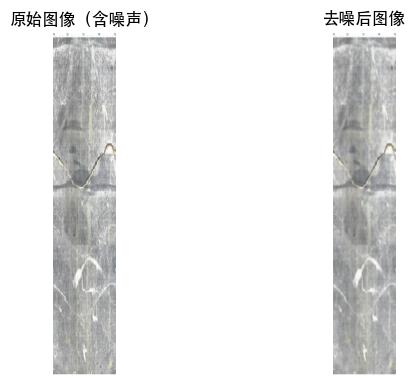

In [7]:
from matplotlib import rcParams
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib import font_manager as fm

image_path = "./images/attach_1_01.jpg"

zh_fonts = [f.name for f in fm.fontManager.ttflist if any(ch in f.name for ch in ['Hei','Song','Sim'])]
if zh_fonts:
    rcParams['font.family'] = zh_fonts[0]  # 使用找到的第一个中文字体
else:
    print("系统中未找到中文字体，中文可能无法显示")

# print(rcParams['font.family'])
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 检查文件是否存在
if not os.path.exists(image_path):
    raise FileNotFoundError(f"图片路径不存在: {image_path}")

# 读取图片
original_pil = Image.open(image_path).convert("RGB")  # 保证是RGB格式

# 去噪函数
def denoise_image(pil_img):
    img = np.array(pil_img)
    # 增强去噪参数
    img = cv2.bilateralFilter(img, d=9, sigmaColor=150, sigmaSpace=150)
    return Image.fromarray(img)

# 去噪图像
denoised_pil = denoise_image(original_pil)

# 绘制对比图
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_pil)
plt.title("原始图像（含噪声）")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_pil)
plt.title("去噪后图像")
plt.axis('off')

plt.tight_layout()
plt.show()

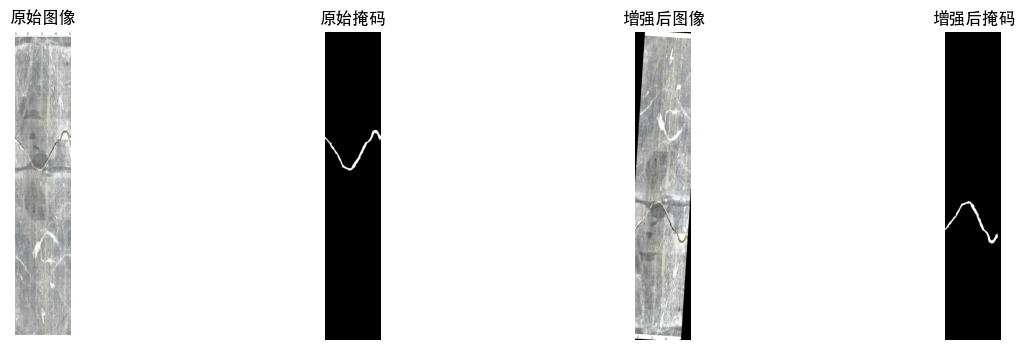

In [13]:
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np
import random
import os

# --- 示例图片路径 ---
image_path = "./images/attach_1_01.jpg"
mask_path = "./masks/attach_1_01.jpg"

# 读取图片和掩码
image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("L")  # 灰度模式

# --- 数据增强函数 ---
def random_augment(img, mask):
    if random.random() > 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
        mask = mask.transpose(Image.FLIP_LEFT_RIGHT)
    if random.random() > 0.5:
        img = img.transpose(Image.FLIP_TOP_BOTTOM)
        mask = mask.transpose(Image.FLIP_TOP_BOTTOM)
    angle = random.uniform(-10, 10)
    img = img.rotate(angle, resample=Image.BILINEAR, expand=False)
    mask = mask.rotate(angle, resample=Image.NEAREST, expand=False)
    factor = random.uniform(0.8, 1.2)
    img = ImageEnhance.Contrast(img).enhance(factor)
    return img, mask

# --- 生成增强图 ---
aug_img, aug_mask = random_augment(image, mask)

# --- 绘制对比图（四个在同一行，间距紧凑） ---
plt.figure(figsize=(16, 4))

images = [image, mask, aug_img, aug_mask]
titles = ["原始图像", "原始掩码", "增强后图像", "增强后掩码"]

for i, (img, title) in enumerate(zip(images, titles)):
    ax = plt.subplot(1, 4, i + 1)
    if img.mode == 'L':  # 灰度图
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis('off')
    ax.set_aspect('equal')  # 保持纵横比

# 调整子图间距
plt.subplots_adjust(wspace=0, hspace=0)  # wspace 越小，水平间距越窄

plt.show()
